Consider the dataset california_housing from sklearn . Find the correlation b/w the different
attributes of this dataset. Using the least square estimation method from sklearn, find the best fit
line. Also find the error.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_19387/1862211612.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
housing_data = fetch_california_housing()
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)

correlation_matrix = df.corr()
print(correlation_matrix)
housing_data = fetch_california_housing()

df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


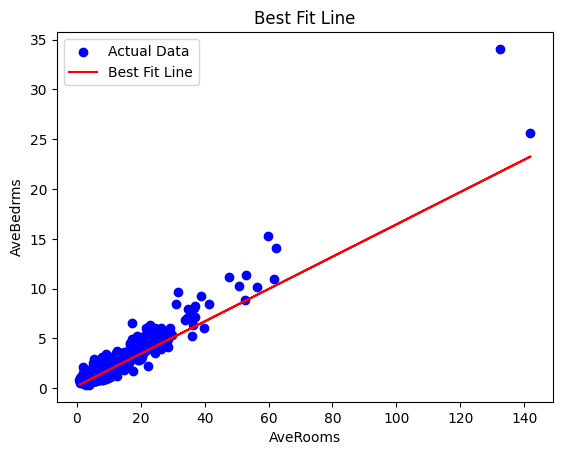

In [3]:
model = LinearRegression()

model.fit(df[['AveRooms']], df['AveBedrms'])

coefficients = model.coef_
intercept = model.intercept_

plt.scatter(df['AveRooms'], df['AveBedrms'], color='blue', label='Actual Data')
plt.plot(df['AveRooms'], model.predict(df[['AveRooms']]), color='red', label='Best Fit Line')
plt.xlabel('AveRooms')
plt.ylabel('AveBedrms')
plt.title('Best Fit Line')
plt.legend()
plt.show()


In [4]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)

predicted_values = model.predict(df[['AveRooms']])
error = predicted_values - df['AveBedrms']
mean_squared_error = np.mean(error ** 2)

print("Mean Squared Error:", mean_squared_error)

Coefficients: [0.16235604]
Intercept: 0.21524426014340325
Mean Squared Error: 0.06322799806785112
